In [39]:
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras

In [3]:
from keras.datasets import mnist

In [43]:
from keras.models import Sequential

In [5]:
from keras import backend as K

In [44]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

In [8]:
img_rows, img_cols = 28, 28

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [28]:
x_train.shape


(60000, 28, 28, 1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

In [32]:
type(x_train)

numpy.ndarray

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [34]:
x_train /= 255
x_test /= 255

In [36]:
print(x_test.shape[0], 'test samples')

10000 test samples


In [41]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


INFO:plaidml:Opening device "opencl_amd_hainan.0"


In [46]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 259s 4ms/step - loss: 0.2657 - acc: 0.9187 - val_loss: 0.0609 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0878 - acc: 0.9739 - val_loss: 0.0387 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0657 - acc: 0.9794 - val_loss: 0.0345 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.0300 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0475 - acc: 0.9859 - val_loss: 0.0276 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.0293 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0365 - acc: 0.9891 - val_loss: 0.0285 - 

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)

In [49]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028017456316947936
Test accuracy: 0.9913


In [102]:
model.save("cnnMNIST.h5")

In [104]:
import matplotlib.pyplot as plt

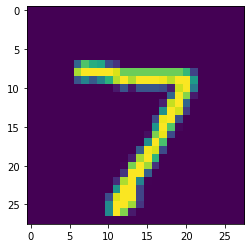

In [129]:
plt.imshow(x_test[0,:,:,0])

In [130]:
y_test[[],:]



array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [136]:
import numpy as np

In [157]:
y = np.expand_dims(x_test[0,:,:,0], axis=0)

In [158]:
y1 = np.expand_dims(y, axis=3)

In [159]:
y1.shape

(1, 28, 28, 1)

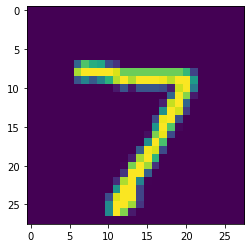

In [160]:
plt.imshow(y1[0,:,:,0])

In [161]:
z = np.expand_dims(y_test[0,:], axis=0)

In [162]:
z.shape

(1, 10)

In [163]:
z[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [164]:
score1 = model.evaluate(y1,z,verbose=0)

In [165]:
score1


[0.0, 1.0]

In [176]:
from PIL import Image
from numpy import asarray

In [177]:
image = Image.open('5.jpeg')

In [178]:
data = asarray(image)

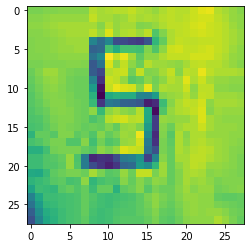

In [202]:
plt.imshow(data)

In [179]:
print(type(data))

<class 'numpy.ndarray'>


In [180]:
print(data.shape)

(28, 28)


In [217]:
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'PIL.Image.Image'>
L
(28, 28)


In [218]:
img = data

In [219]:
img_copy = img.copy()

In [220]:
img_copy = img_copy/255

In [221]:
y = np.expand_dims(img_copy, axis=0)
y1 = np.expand_dims(y, axis=3)
y1.shape

(1, 28, 28, 1)

In [222]:
r = np.argmax(model.predict(y1,verbose=0))

In [223]:
r

5